# Convolutional Neural Network for Boats Classification

We will be using Keras to build our Convolutional Neural Network(CNN).
This network will be used to classify 3 different kinds of boats, which can be seen in Venice, Italy. We need to classify them in order to detect which boat is passing through the canal.

First of all, we split our dataset into training set and test set folders, so we can ease the the data preprocessing
in order to reduce the computational complexity. After splitting the dataset we will start building our network, here we will be adding 3 convolutional layers, we will apply max pooling for each layer, and we will add 3 fully connected layers. In the hidden layers we will be using the ReLu activation function. In the output layer, we will use the softmax activation function, because we have more than 2 classes.

Second, we will train our network and test it in order to check the accuracy between the training set and test set.

Finally, I created a file called predictions , containing photos from the 3 classes other than the ones in the test set and training set, to import pictures and check the accuracy of the classifications.

In [42]:
# Sequential to make the sequence of the layers
from keras.models import Sequential

# Convolution2D to add the convolutional layers
from keras.layers import Convolution2D

# Maxpooling for the pooling layers, here we will use the "max pooling"
from keras.layers import MaxPooling2D

# Flatten is used to convert the feature maps into a vector that is going to be the input layer for the Neural Network
from keras.layers import Flatten

# Dense is used to add the fully connected layers into the Neural Network
from keras.layers import Dense

# We will use dropout to discard neurons during the learning process, which helps preventing overfitting
from keras.layers import Dropout

# ImageDataGenerator is used to apply augmentation, rescaling... on the dataset, in order to prevent overfitting 
from keras.preprocessing.image import ImageDataGenerator

# For predictions
from keras.preprocessing import image

import numpy as np

import os, os.path

## Initializing the CNN

### Step 1- Convolution

We get the input image, and apply feature detectors to get the feature maps.
We choose the number of feature detectors and feature maps and get the convolutional layer.

In classifier.add the arg convolution2D contains the following parameters: 

1st parameter: number of filter which are the feature detectors that we will apply on our image number of filters will be equal to the number of feature maps also that we will implement. 

2nd parameter: is the number of rows of the feature detector, followed by the number of columns of the feature detector.

3rd parameter: input_shape which will shape all the images into the same size. 3 stands for 3D because it is a colored image, so it is a 3 channels pic and we will use 64x64 dimensions because we want to save time since we are using the CPU and not the GPU we can go up till 256x256.

4th parameter is the activation function and here we are using it to make sure that we are not having any negative pixel values in our feature maps so we have non linearity, because images are a nonlinear problem and we need to have nonlinearity in our model.





### Step 2- Pooling

Here we will be looking inside the feature map with a stride = 2.

By applying pooling we don't loose the spatial structure information, and we don't loose the performance of the model and we reduce the time complexity.
The parameters in maxpooling are the size of the pool that we are going to use and here we will use the size = 2. 

We will add a second convolutional layer to improve the accuracy of the model, and reduce overfitting, because we faced overfitting without the second layer.
In the second convolutional layer, we don't need the inout shape because we have the pooled features map of the previous layer.

We will add a third layer while doubling the number of feature detectors, and we can add more and more layers, and test our network to see if we get better results.

In [2]:
classifier = Sequential() 
classifier.add(Convolution2D(32, (3, 3), input_shape = (128, 128, 3), activation = "relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Convolution2D(32, (3, 3), activation = "relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Convolution2D(64, (3, 3), activation = "relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

### Step 3- Flattening

We apply the flattening step to convert the feature maps in the pooling layer that contains all our feature maps into a vector that is going to be our Artificial Neural Network input.

Here we don't need to put any parameters because we are using keras, and it will automatically convert our data into a feature vector since we are using our classifier.

In [3]:
classifier.add(Flatten())

### Step 4- Full Connection

Now we will implement the fully connected Artificial Neural Network.

The features vector will be the input for the ANN.

we use the Dense function to create the fully connected layer, since it is pre-defined in keras.

First parameter is units which is the number of nodes in the hidden layer which we will choose as 128 becasue we have a high number of inputs
Second parameter is the activation function and we will use the relu here.

We will apply dropout, because dropping out nodes during the training helps preventing overfitting since it discards some nodes in order to reduce the dependancy between the nodes, and prevent the neurons from being over trained.
the only parameter in the dropout is the percentage of nodes to be disregarded during the training process.

In [4]:
classifier.add(Dense(activation = "relu", units = 128))
classifier.add(Dropout(0.1))
classifier.add(Dense(activation = "relu", units = 128))
classifier.add(Dropout(0.5))
classifier.add(Dense(activation = "relu", units = 128))
classifier.add(Dropout(0.5))

#### Adding the output layer

Now we will add the output layer.

here we will use the softmax function because we have multiple classes classification, if we had only 2 categories in the output we could have used the sigmoid function.

Units = number of outputs = 3.

In [5]:
classifier.add(Dense(activation = "softmax", units = 3))

#### Compiling the CNN

In the compile method:
First parameter is the optimizer where we are going to choose the rmsprop.
Second parameter to choose the loss function which is the categorical cross entropy here because we are dealing with a classification problem and because we have a multiple classes outcome.
If we had 2 categories we will need to choose the cross entropy loss function.
Third parameter is the performance metric and we will choose the accuracy metric

In [6]:
classifier.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

#### Fitting the CNN to the images

We will use keras documentation shortcut for image augmentation that preprocesses the images to prevent overfitting, because without this step we might get a great accuracy result on the training set and a much lower accuracy on the test set, and this step is mendatory because we don't have a huge number of images that prevents us from overfitting.

Image augmentation will create batches of our images and in each batch using a random selection of images which will augment our training set by rotating, shifting, or flipping the images.

Data augmentation will enrich our dataset without adding more images.

We will import our dataset first of all.

The batch size is the number of images that will go through the CNN after which, the weights will be updated.

Target size contains the dimensions.

class_mode is the number of classes that we are including in our training which is 3 here and that's why we choose categorical.

In [7]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        '/training_set',
        target_size=(128, 128),
        batch_size=32,
        class_mode="categorical")

test_set = test_datagen.flow_from_directory(
        '/test_set',
        target_size=(128, 128),
        batch_size=32,
        class_mode="categorical")

classifier.fit_generator(
        training_set,
        steps_per_epoch=(1329/32),
        epochs=25,
        validation_data=test_set,
        shuffle=True,
        validation_steps=(388/32))

# Saving the weights
classifier.save_weights('first_try.h5')

Found 1329 images belonging to 3 classes.
Found 388 images belonging to 3 classes.
Epoch 1/25
42/41 [==============================] - 124s 3s/step - loss: 1.1223 - acc: 0.4804 - val_loss: 0.9529 - val_acc: 0.5103
Epoch 2/25
42/41 [==============================] - 136s 3s/step - loss: 0.8944 - acc: 0.5488 - val_loss: 0.9051 - val_acc: 0.6753
Epoch 3/25
42/41 [==============================] - 137s 3s/step - loss: 0.7513 - acc: 0.6627 - val_loss: 0.7117 - val_acc: 0.6701
Epoch 4/25
42/41 [==============================] - 102s 2s/step - loss: 0.6488 - acc: 0.6969 - val_loss: 0.5969 - val_acc: 0.7397
Epoch 5/25
42/41 [==============================] - 60s 1s/step - loss: 0.6081 - acc: 0.7214 - val_loss: 0.5027 - val_acc: 0.7655
Epoch 6/25
42/41 [==============================] - 67s 2s/step - loss: 0.5312 - acc: 0.7651 - val_loss: 0.7614 - val_acc: 0.6830
Epoch 7/25
42/41 [==============================] - 58s 1s/step - loss: 0.4927 - acc: 0.8112 - val_loss: 0.4211 - val_acc: 0.8479
Epo

As shown above, we have an accuracy of 96.87% on the training set and validation accuracy of 0.21 on the test set. it is clear also that we didn't face overfitting, and one way to show this is to look to the difference between the accuracy and the validation accuracy which is ~6%

#### To predict a pic 

we will create a new variable that will contain:

1- the image that we will load
2- the target size which will be same same as we used in our training set and test set

After the test image is imported, we should add a new dimension to this test image, because the input shape in the input layer of the CNN is 3 dimensions 128 x 128 where 3 represents the color of the image
In order to modify the test image variable from 2D to 3D, we should used the image to array function 

Now we need to add 1 dimension again to the 3D array, because if we didn't add it we will have an error that is saying that we need to have a 4 dimensions array, and this 4th dimension corresponds to the batch
we will usenp.expand_dims function to expand the image
Inside the expand_dims function we will put 2 arguments
1- the test image
2- axis to specify the index of the dimension that we are adding, which is going to be the first column (index 0) because this is how the predict function reads it

to get that information, we need to use an attribute that is called class indices


[[ 0.  0.  1.]]
{'Lanciafino10mBianca': 0, 'Lanciafino10mMarrone': 1, 'Mototopo': 2}


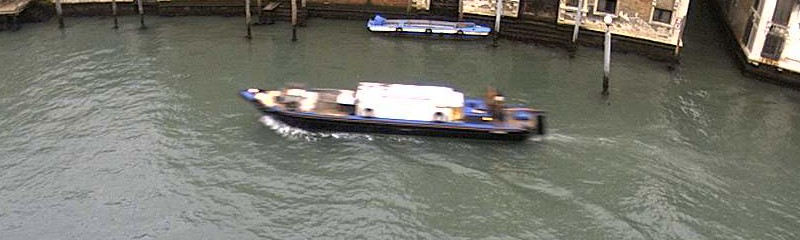

In [66]:
test_image_raw = "/predictions/p7.jpg"
test_image = image.load_img(test_image_raw, target_size = (128, 128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
print(result)
print(training_set.class_indices)
from IPython.display import Image
Image(filename = test_image_raw) 

In [67]:
if result [0][0] == 1:
    prediction = "Lanciafino10mBianca"
elif result [0][1] == 1:
    prediction = "Lanciafino10mMarrone"
elif result [0][2] == 1:
    prediction = "Mototopo"
print('The boat is ' + prediction)

The boat is Mototopo
